In [252]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import sympy as sym
from IPython.display import Image

Updated on 12/1/2022

# Involute Gear Calculator

This Jupyter Notebook contains all the calculations for generating a gear tooth profile coordinates that be imported into 3d modeling software.

As of 12/1/2022, only gears with a module = 1 are supported.

You can download the .blend file that has a functional gear set that I built using the techniques and tools I'm providing in this document [here](http://madmodels3d.com/#/projectdetails/316) . (Please feel free to join)

### Calculations for tooth profile with module = 1

Basic gear parameters:

$ z $ number of teeth

$ m $ module $ \frac{p}{pi} $

$ p $ pitch $ \frac{d}{z} $

$ d $ reference diameter/pitch diameter

$ d_b $ base diameter

$ d_{b/2} $ base radius

$ d_a $ tip  diameter


A gear tooth can be defined as a segment of the so called involute of a circle.

This involute maintains smooth power transmision between teeth, by ensuring a fixed direction of force, called a pressure angle. Usually this angle is 20 degrees.

The equations I'm using to generate the gear teeth are:

######  $ x = d_{b/2} \cdot cos(u) + u \cdot sin(u) $
######  $ y =  d_{b/2} \cdot sin(u) - u \cdot cos(u) $

For two gears to be compatable, their modules must be the same. In this calculator, the module will be 1

base radius 14.095425
base diameter 28.19085
base circ 88.56416725845182
ref diameter 30
tip diameter 32
tip radius 16.0
root diameter 27.5
root radius 13.75


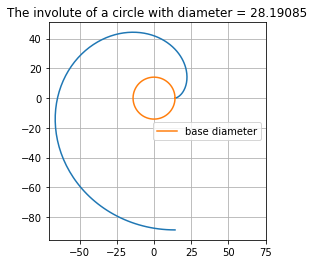

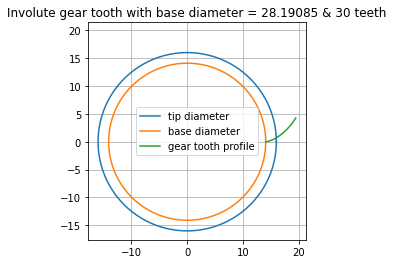

In [19]:
# %matplotlib notebook
u = np.linspace(0,2*np.pi,200)
# z = 60 # number of teeth
z = 30
ref_dia1 = z # reference diameter
ref_radi = ref_dia1/2
tip_dia1 = ref_dia1 + 2
tip_radi = tip_dia1/2
base_dia1 = ref_dia1*.9396950000000001
base_circ = base_dia1*np.pi
base_radi = base_dia1/2
root_diameter = ref_dia1 - 2.5
root_radi = root_diameter/2
print('base radius',base_radi)
print('base diameter',base_dia1)
print('base circ',base_circ)
print('ref diameter',ref_dia1)
print('tip diameter',tip_dia1)
print('tip radius',tip_radi)
print('root diameter',root_diameter)
print('root radius',root_radi)


# --- Involute of a circle --- #
x = (base_dia1/2)*(np.cos(u) + u * np.sin(u))
y = (base_dia1/2)*(np.sin(u) - u * np.cos(u))
plt.title("The involute of a circle with diameter = %s"%base_dia1)
plt.plot(x,y)
plt.plot((base_dia1/2)*np.cos(u),(base_dia1/2)*np.sin(u),label="base diameter")
plt.grid('on')
plt.axis('square')
plt.legend()
plt.show()

# --- Involute of gear tooth --- #
pitch1 = (np.pi*ref_dia1) / z # pitch
module1 = ref_dia1 / z # module
# Tip diameter
plt.plot(tip_radi*np.cos(u),tip_radi*np.sin(u),label="tip diameter")
# Base diameter
plt.plot(base_radi*np.cos(u),base_radi*np.sin(u),label="base diameter")

u1 = np.linspace(0,1,100)
x = (base_dia1/2) * (np.cos(u1) + u1 * np.sin(u1))
y = (base_dia1/2) * (np.sin(u1) - u1 * np.cos(u1))

plt.plot(x,y,label="gear tooth profile")
plt.title('Involute gear tooth with base diameter = %s & %s teeth'%(base_dia1,z))
plt.axis('square')
# plt.axis([20,z-20,-10,10])
plt.grid('on')
plt.legend()
plt.show()

In this plot, the tooth protrudes from the tip diameter. The same thing will happen in the profile generated in Blender, and you will have to trim this portion off. This is simple enough to do in Blender once the plots are generated.

I've added additional geometry to help achieve proper tooth thickness.

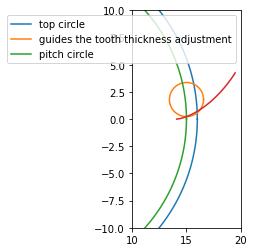

In [262]:
rad_difference = (ref_radi-base_radi)*(.25)+1.57
thickness = z/np.pi

plt.plot(tip_radi*np.cos(u),tip_radi*np.sin(u),label="top circle")
plt.plot(ref_radi+1.57*np.cos(u),rad_difference+1.57*np.sin(u),label="guides the tooth thickness adjustment")
plt.plot(ref_radi*np.cos(u),ref_radi*np.sin(u),label="pitch circle")
plt.plot(x,y)
plt.legend()
plt.axis('square')
plt.axis([10,20,-10,10])
plt.show()

#  Creating plots in Blender with build_a_gear.py

This script generates the gear tooth profile in Blender. Just paste the code into Blender's script editor, and enter the desired number of teeth. 

You'll need to follow the instructions below to complete your gear.

In [264]:
# --- build_a_gear.py --- #
import bpy
import math as math
import numpy as np
z = 20 # Number of teeth
u = np.linspace(0,1,10) # matrix
thickness = math.pi/2
ref_radius = z/2
base_radius = ref_radius*.9396950000000001

x = base_radius * ((np.cos(u)) + u * np.sin(u))
y = base_radius * ((np.sin(u)) - u * np.cos(u))
coords = []


def createMeshFromData(name, origin, verts, edges, faces):
    # Create mesh and object
    me = bpy.data.meshes.new(name+'Mesh')
    ob = bpy.data.objects.new(name, me)
    ob.location = origin
    ob.show_name = False
    # Link object to scene and make active
    bpy.context.collection.objects.link(ob)
    ob.select_set(True)

    # Create mesh from given verts, faces.
    me.from_pydata(verts, edges, faces)

    # Update mesh with new data
    me.update()

for i in range(len(x)):
    coords.append([x[i],y[i],0])

# --- Thickness parameters and objects --- #
rad_difference = (ref_radius-base_radius)*(.25)

# Thickess circle
bpy.ops.mesh.primitive_circle_add(radius=1.57,enter_editmode=False, location=(ref_radius*math.cos(0), math.sin(rad_difference), 0))

# Pitch circle
bpy.ops.mesh.primitive_circle_add(radius=z/2,enter_editmode=False, location=(0, 0, 0))

# Outside diameter
bpy.ops.mesh.primitive_circle_add(radius=z/2+1,enter_editmode=False, location=(0, 0, 0))

# --- Tooth generator --- #
edges1 = [[len(coords) - 1, 0]]
for i in range( 0, len(coords)-1):
    edges1.append( [i, i+1] )
    
createMeshFromData( 'Profile', [0, 0, 0], coords, edges1, [] )

# Generating the geometry:

### The profile:

* Copy "build_a_gear.py" script into blender script editor (from the above code cell) 

* Enter number of teeth and run the script
 
* Select "Pofile" by right or left clicking on it in the 3d view port

* Enter edit mode by pressing the tab key

* Select "edge select" (Edge and Vertex select are in the upper left corner in the photo. they may be located elsewhere depending on the version of Blender you're using and current configuration)

* Select the straight line connecting the ends of the profile and delete by pressing x / Edges

* Select "Vertex select"

* Select all the vertices outside of the outer most circle (the tip diameter)

* Delete these vertices by pressing x / Vertices

* Select the entire tooth profile by pressing "a" and duplicate by pressing shift+d and enter

* Rotate around the x-axis by pressing r, x, 180 and enter

* Rotate around the z-axis until the tooth profile intersects the measuring cicle and the innermost circle (the reference diameter)

* Exit edit mode by pressing tab






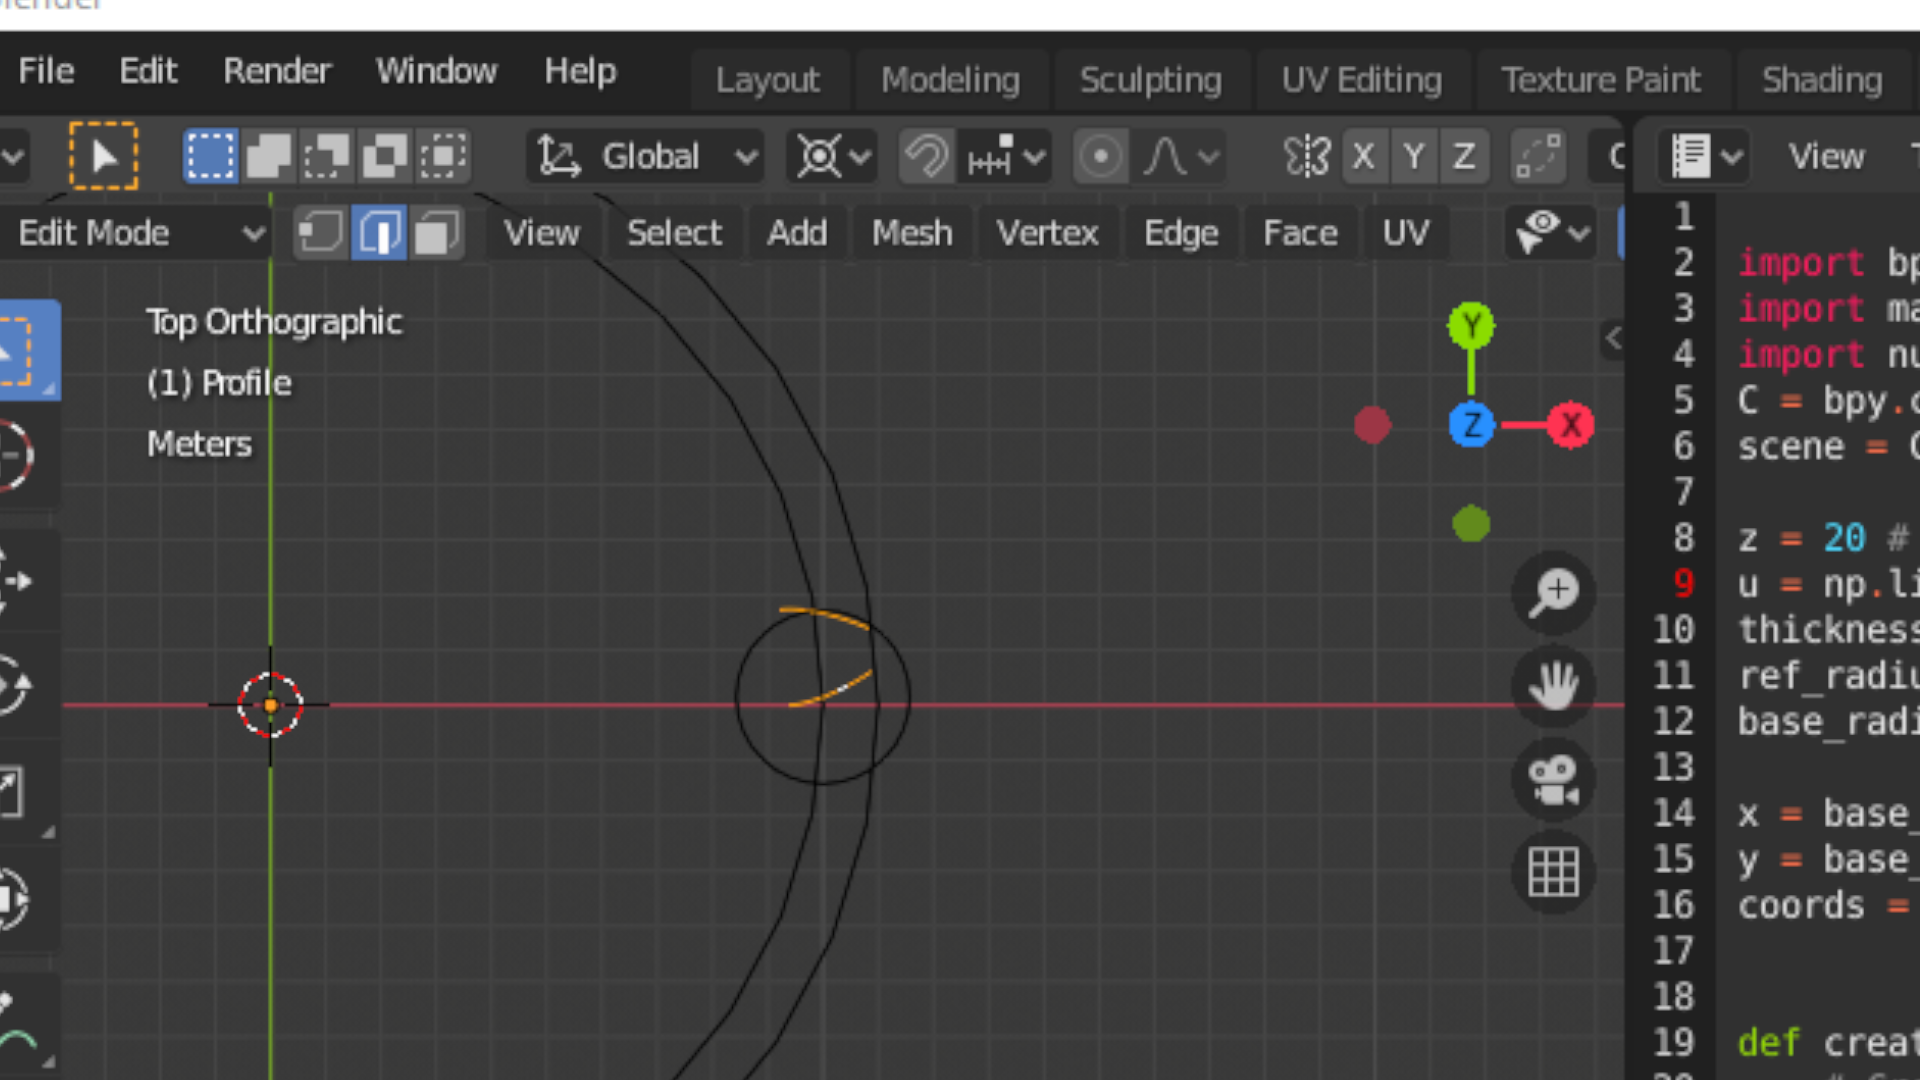

In [257]:
Image("inv_gear_images/full tooth thickness.png", width = 600, height = 300)

### Cleanup:

* You will then need to delete all the other objects that were generated by the script.

* Unselect everything by pressing alt+a

* Select each of the circles by clicking on them with the right or left mouse button while holding shift.

* Make sure the gear tooth profile is NOT selected

* Delete by pressing x.

### Connect the components:

* Select the tooth by clicking

* Enter edit mode by pressing tab

* Select "Vertex select"

* Select the two vertices on the tip of the tooth by pressing shift and clicking

* Connect the two vertices by pressing f.

##### The gear tooth profile is complete.

# Building the gear

### Connecting the first two teeth:

The pitch is the distance between two corresponding points on two teeth, which can be found by the formula $ \frac{d}{z} $.

To space the gears appropriately, each one needs to rotate a distance of $ n = \frac{360 ^{\circ}}{z+n} $ ( $n$ being the accumulating sum of each tooth rotation in degrees)

The gear in this example has 20 teeth, so the rotation $ n = 18 ^{\circ} $

###### $\displaystyle\sum_{n = 18 ^{\circ}} ^{20} n += n$

* Enter edit mode

* Press "a" to select all gear tooth vertices

* Duplicate by pressing shift+d

* Rotate around the z-axis 18 degrees by pressing r, z, 18 and enter

* Deselect all the vertices. then select the innermost vertex of each tooth by holding shift and clicking each.

* Press shift+s and select "Cursor to selected"

* Exit edit mode and in the top, click Object/Set Origin/Origin to 3d Cursor

* Enter edit mode and deselect one of the vertices

* Select the spin tool on the left toolbar and give it a spin. Click the "Spin" options that just appeared at the bottom left of the view port and enter 180 for angle

* Then select the "Select" option on the toolbar

* Press shift+s and select "Cursor to world origin"

* Select everything by pressing "a"

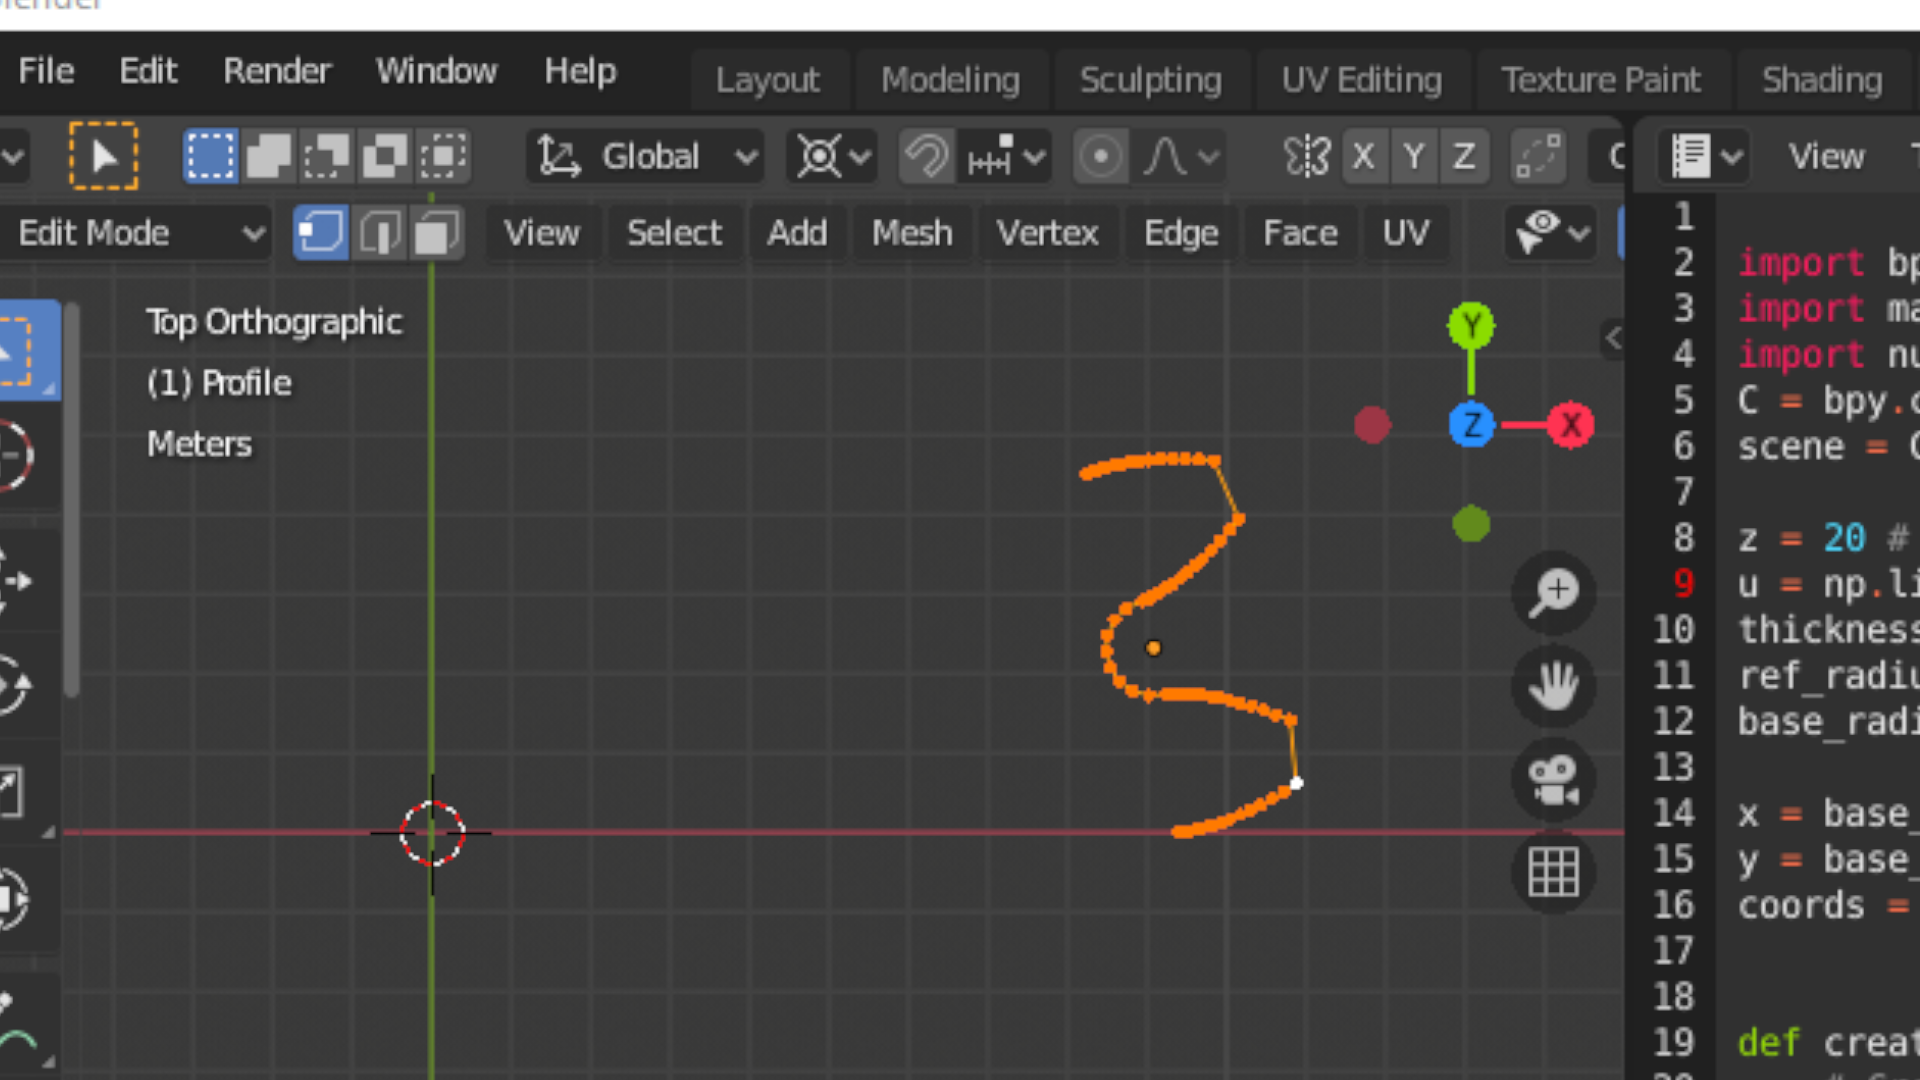

In [258]:
Image("inv_gear_images/tooth layout.png", width = 600, height = 300)



### Populating the pitch circle:

###### Follow these instructions exactly to speed up the next process

* Press shift+d, r, z, 18 and enter in that order exactly

* If you did it correctly, when you press shift+r, the process should repeat. Keep pressing shift+r until the populating teeth wrap around in a 360 degree circle

### Cleanup:

There is a lot of uneccesary geometry that must be removed.

* select everything by pressing "a"

* At the top of the viewport, select Vertex/Merge Vertices/By Distance.

The gear outline is complete and ready to by turned into a 3d object.

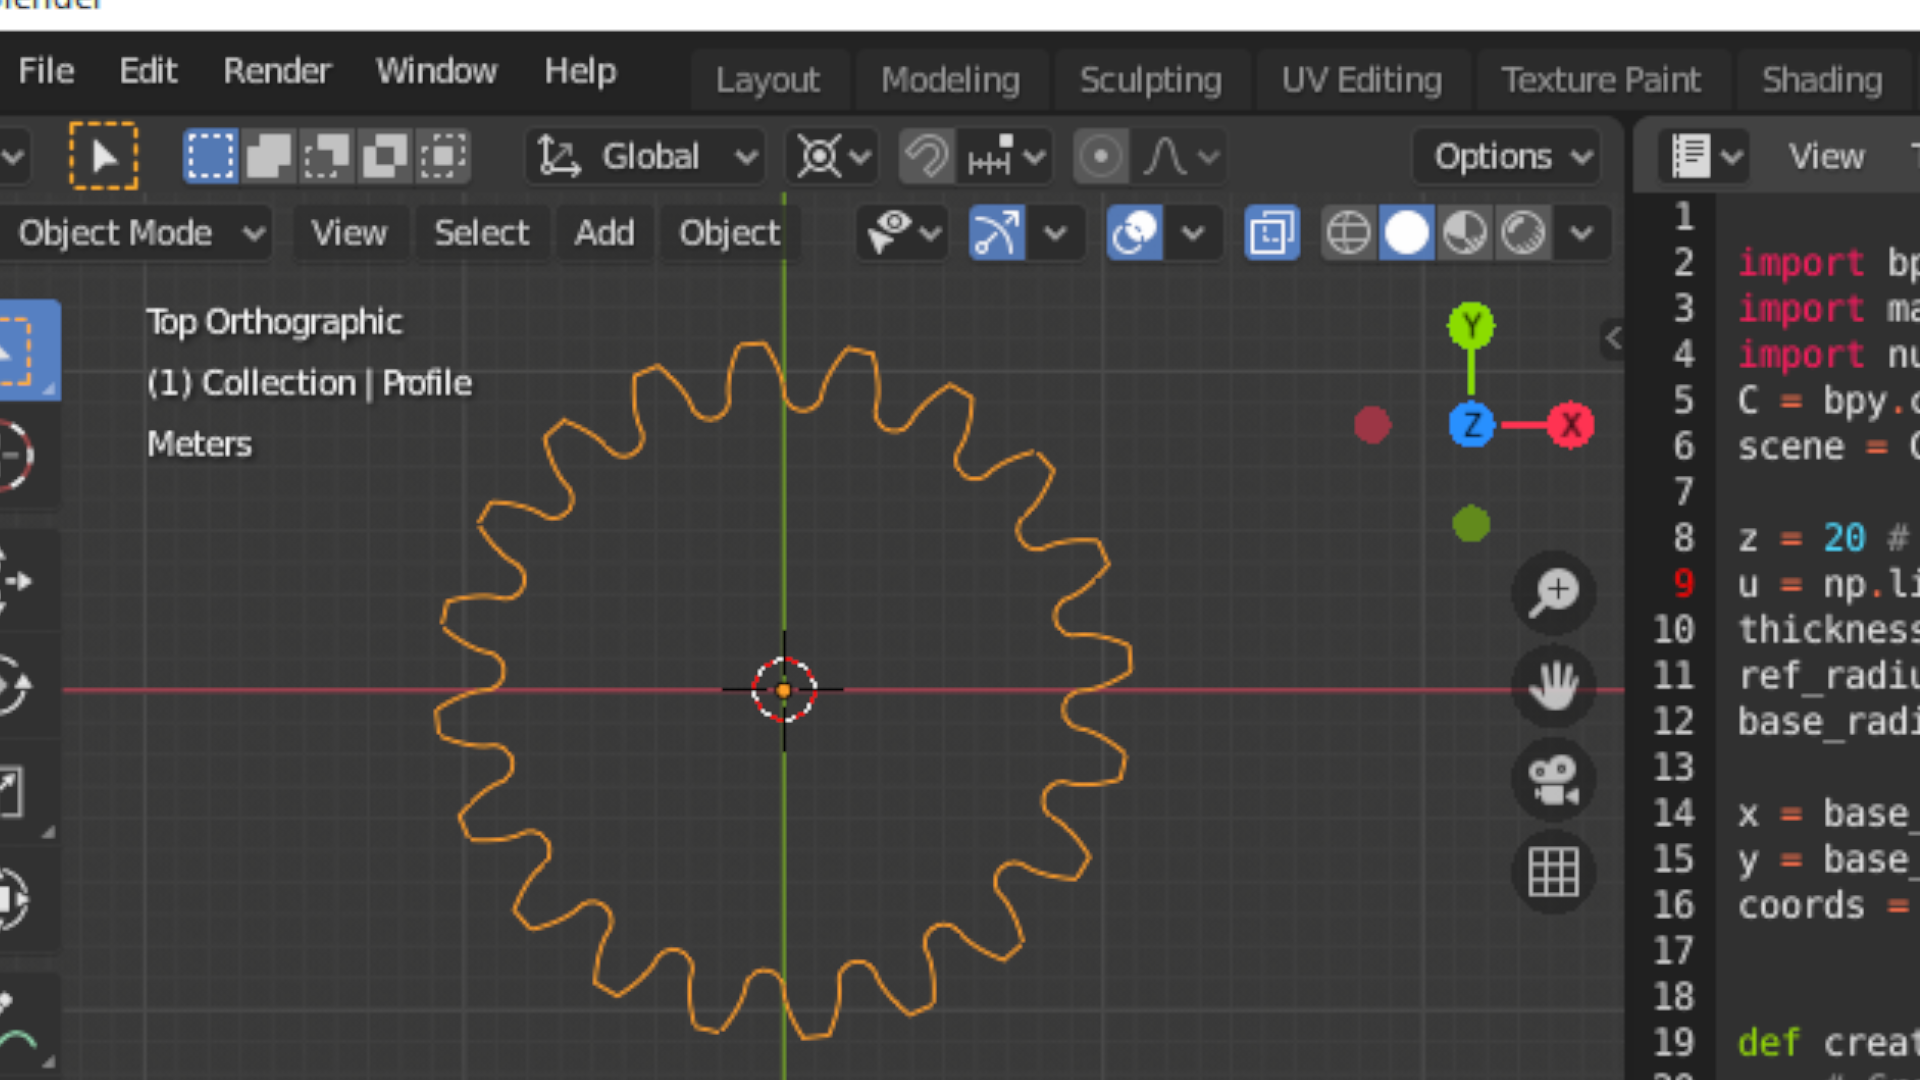

In [259]:
Image("inv_gear_images/complete gear outline.png", width = 600, height = 300)

Eventually, I will be adding instructions on converting this outline into a 3d object, and how to rig two gears for animation to test their compatibility.

For two gears to be compatible, they must have the same module. I will be adding new modules over time.

You can download this notebook from my github repository [here](https://github.com/Nefari0/gear-calulators.git)

You can also find the .blend file I'm using to test this calculator [here](http://madmodels3d.com/#/projectdetails/316) . (Please feel free to join)

Please contact me through my portfolio site:

[chris.madmodels3d.com](http://chris.madmodels3d.com/)